In [1]:
#Aim: Implementation of MNIST Handwritten Character Detection using PyTorch, Keras and Tensorflow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
# Dividing the mnist data into training and testing
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train),len(x_test),x_train[0].shape

(60000, 10000, (28, 28))

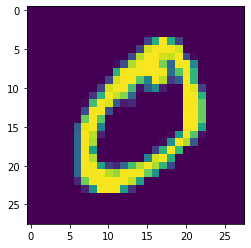

In [5]:
# Goal : 
plt.imshow(x_train[1])
plt.show()

In [6]:
y_train[1]

0

In [7]:
# Scale down the dataset for better accuracy
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
# Converting 2D array of images into 1D array
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [10]:
# Building the ANN model
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
28*28

784

In [12]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2764 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1263 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0529 - accuracy: 0.9838


In [13]:
# Evaluating the model
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9741


[0.08899141848087311, 0.9740999937057495]

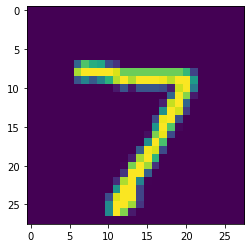

In [14]:
# Final Predictions
plt.imshow(x_test[0])

In [15]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.1656994e-02, 1.1099095e-03, 3.1894094e-01, 9.6983778e-01,
       7.1224491e-07, 1.1928258e-03, 4.3417963e-08, 9.9999309e-01,
       1.2829509e-01, 2.2001876e-01], dtype=float32)

In [16]:
print('The number is :',np.argmax(y_predicted[0]))

The number is : 7
